In [1]:
file = 'HR_Dataset.csv'

**Features:**  
*names* - Employee's name  
*satisfaction_level* - Employee's satisfaction rating towards the company  
*last_evaluation* - The latest performance evaluation rating from the employer to the employee  
*number_project* - The number of projects handled by the employee in the latest month  
*average_monthly_hours* - The average monthly working hours of the employee
*exp_in_company* - The number of years an employee has been working in the company  
*work_accident* - Whether there is any work accidents occurred on the employee to date (0 - no; 1 - yes)  
*left* - Whether the employee has left the company (0 - still with the company; 1 - left)  
*promotion_last_5years* - Whether the employee is promoted in the last 5 years (0 - no; 1 - yes)  
*role* - Role of the employee in the company  
*salary* - Salary category of the employee (Low; Medium; High) 

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(file)
df.shape

(15000, 11)

In [4]:
df.head()
#df.tail()
#df.sample(10)

,names,satisfaction_level,last_evaluation,number_project,average_monthly_hours,exp_in_company,work_accident,left,promotion_last_5years,role,salary
0,Jessica Stroud,0.38,0.53,2,157,3,0,1,0,sales,low
1,Daryl Fields,0.80,0.86,5,262,6,0,1,0,sales,medium
2,Daisy Anderson,0.11,0.88,7,272,4,0,1,0,sales,medium
3,Joseph Fernandez,0.72,0.87,5,223,5,0,1,0,sales,low
4,Herbert Moore,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,exp_in_company,work_accident,left,promotion_last_5years
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,0.612847,0.716115,3.803133,201.052400,3.498333,0.144600,0.238133,0.021267
std,0.248628,0.171171,1.232590,49.942074,1.460139,0.351709,0.425955,0.144277
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
df.describe(include = 'all')

,names,satisfaction_level,last_evaluation,number_project,average_monthly_hours,exp_in_company,work_accident,left,promotion_last_5years,role,salary
count,15000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000,15000
unique,14746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,James Brown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7317
mean,NaN,0.612847,0.716115,3.803133,201.052400,3.498333,0.144600,0.238133,0.021267,NaN,NaN
std,NaN,0.248628,0.171171,1.232590,49.942074,1.460139,0.351709,0.425955,0.144277,NaN,NaN
min,NaN,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   names                  15000 non-null  object 
 1   satisfaction_level     15000 non-null  float64
 2   last_evaluation        15000 non-null  float64
 3   number_project         15000 non-null  int64  
 4   average_monthly_hours  15000 non-null  int64  
 5   exp_in_company         15000 non-null  int64  
 6   work_accident          15000 non-null  int64  
 7   left                   15000 non-null  int64  
 8   promotion_last_5years  15000 non-null  int64  
 9   role                   15000 non-null  object 
 10  salary                 15000 non-null  object 
dtypes: float64(2), int64(6), object(3)
memory usage: 1.3+ MB


In [8]:
df['work_accident'].unique()

array([0, 1])

In [9]:
df['role'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [10]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

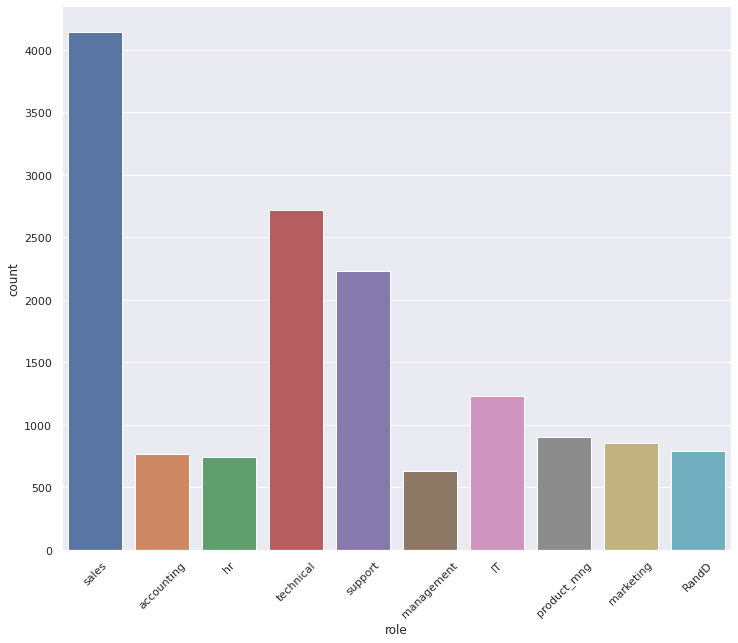

In [11]:
sns.set(rc = {'figure.figsize':(12,10)})
sns.countplot(data = df, x = 'role');
plt.xticks(rotation = 45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

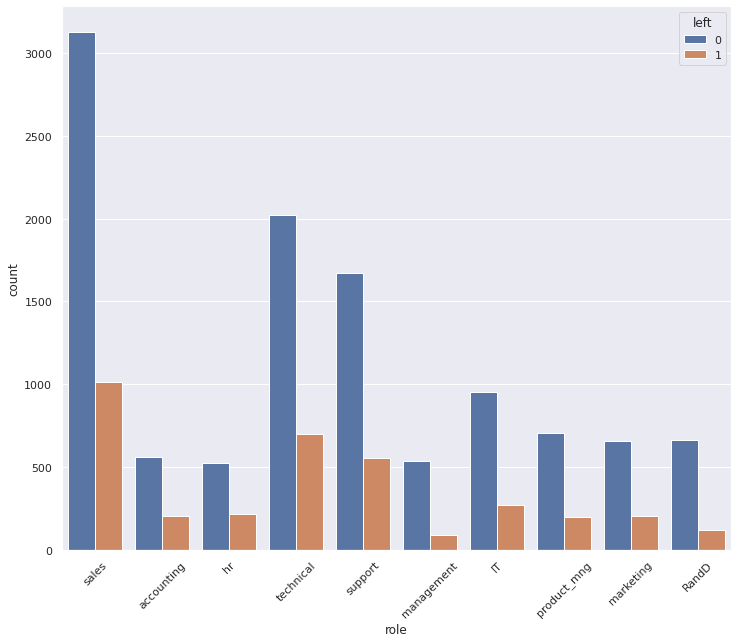

In [12]:
sns.countplot(data = df, x = 'role', hue = 'left')
plt.xticks(rotation = 45)

[Text(0.5, 0, 'Percentage')]

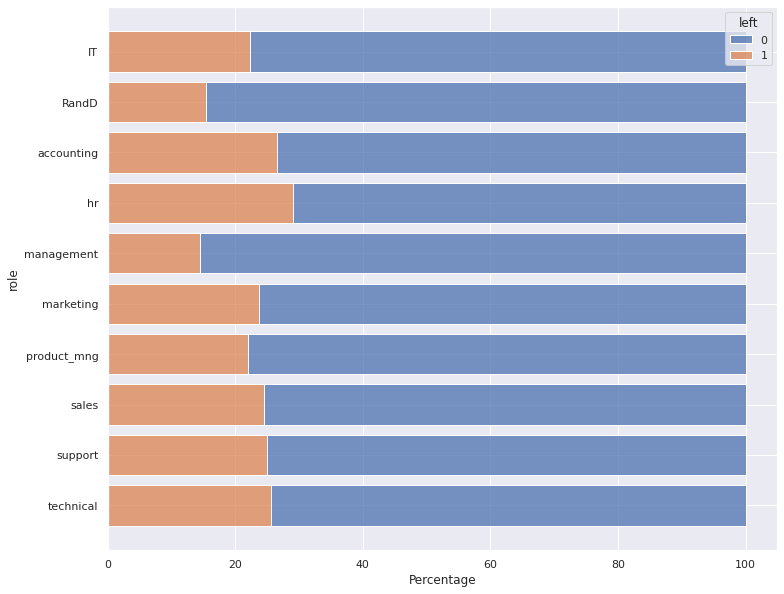

In [13]:
#Stacked Percntage Bars
#group by role, left column, count number of observation (norm = True means percentage)
perc = df.groupby('role')['left'].value_counts(normalize = True).mul(100).reset_index(name = 'percentage')
sns.histplot(data = perc, y = 'role', hue = 'left', weights = 'percentage', multiple = 'stack',
             shrink = 0.8).set(xlabel = 'Percentage')
#plt.xticks(rotation = 45)

In [14]:
perc

,role,left,percentage
0,IT,0,77.750611
1,IT,1,22.249389
2,RandD,0,84.625159
3,RandD,1,15.374841
4,accounting,0,73.402868
5,accounting,1,26.597132
6,hr,0,70.906631
7,hr,1,29.093369
8,management,0,85.555556
9,management,1,14.444444


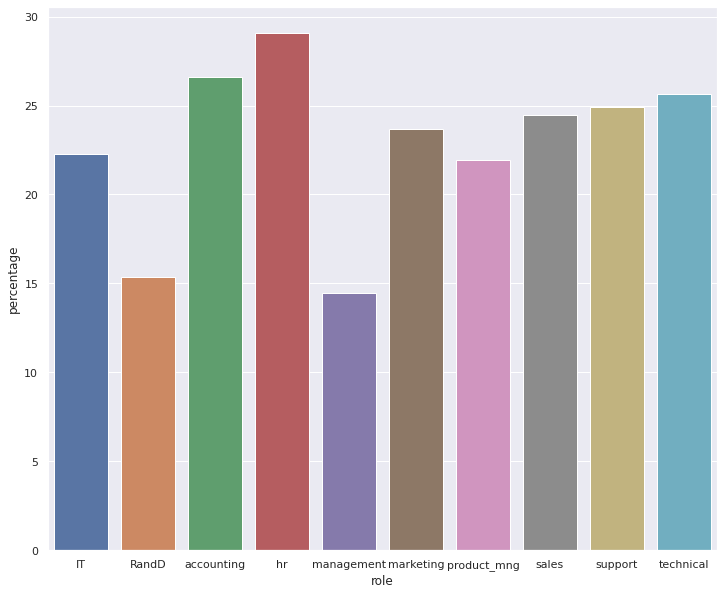

In [15]:
perc1 = perc[perc.left == 1]
perc1
sns.barplot(data = perc1, x = 'role', y = 'percentage')

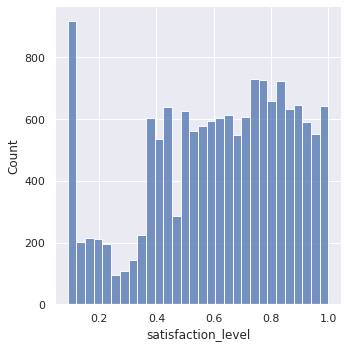

In [16]:
sns.displot(data = df, x = 'satisfaction_level')

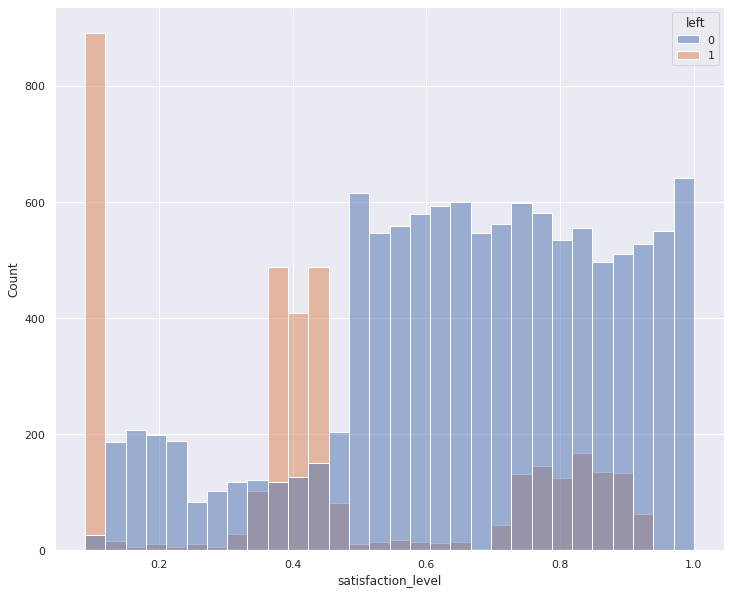

In [17]:
sns.histplot(data = df, x = 'satisfaction_level', hue = 'left')
#Employee rates Employer

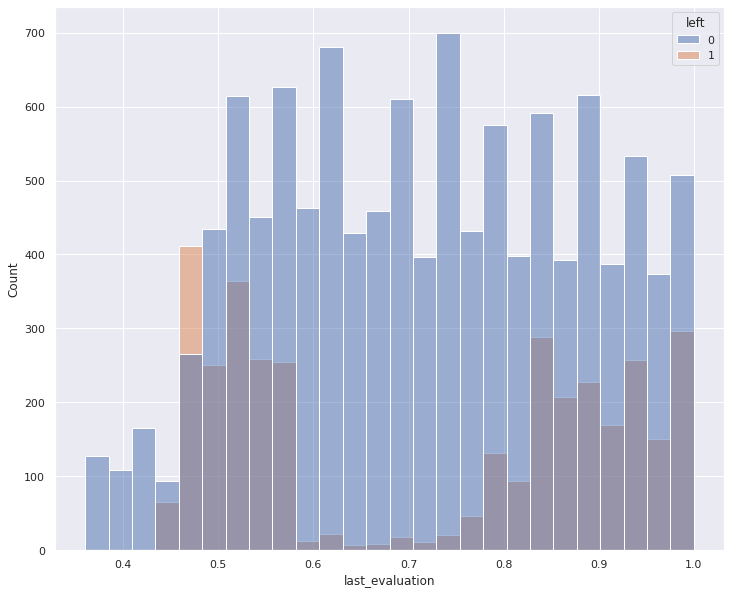

In [18]:
sns.histplot(data = df, x = 'last_evaluation', hue = 'left')
#Employer Rates Employee

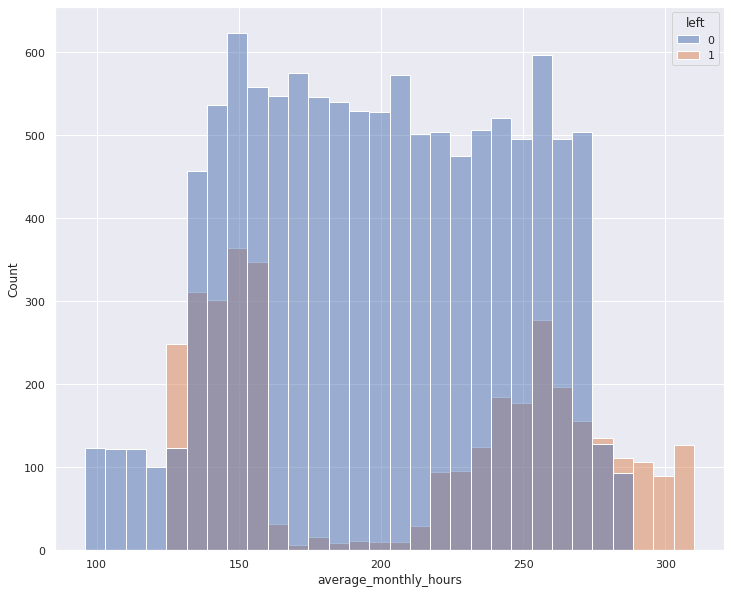

In [19]:
sns.histplot(data = df, x = 'average_monthly_hours', hue = 'left')

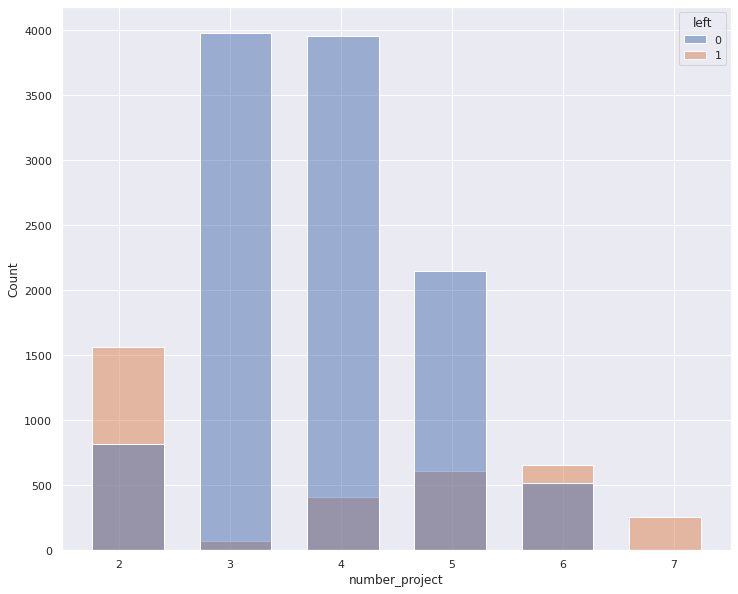

In [20]:
sns.histplot(data = df, x = 'number_project', hue = 'left', shrink = 4)

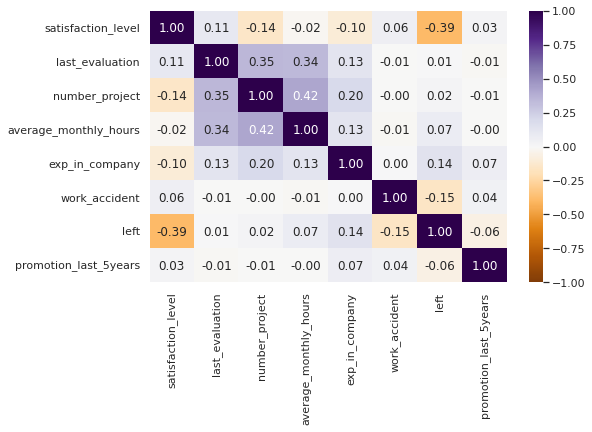

In [21]:
sns.set(rc = {'figure.figsize':(8,5)});
sns.heatmap(df.corr('pearson'), cmap = 'PuOr', fmt = '.2f', annot = True, vmin = -1, vmax = 1, center = 0);

In [22]:
df['salary'] = df['salary'].replace({"low": 1, "medium": 2, "high": 3})

role_dummies = pd.get_dummies(df['role'])
df = df.drop(['names', 'role'], axis = 1).join(role_dummies)
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,exp_in_company,work_accident,left,promotion_last_5years,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,2,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,2,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0


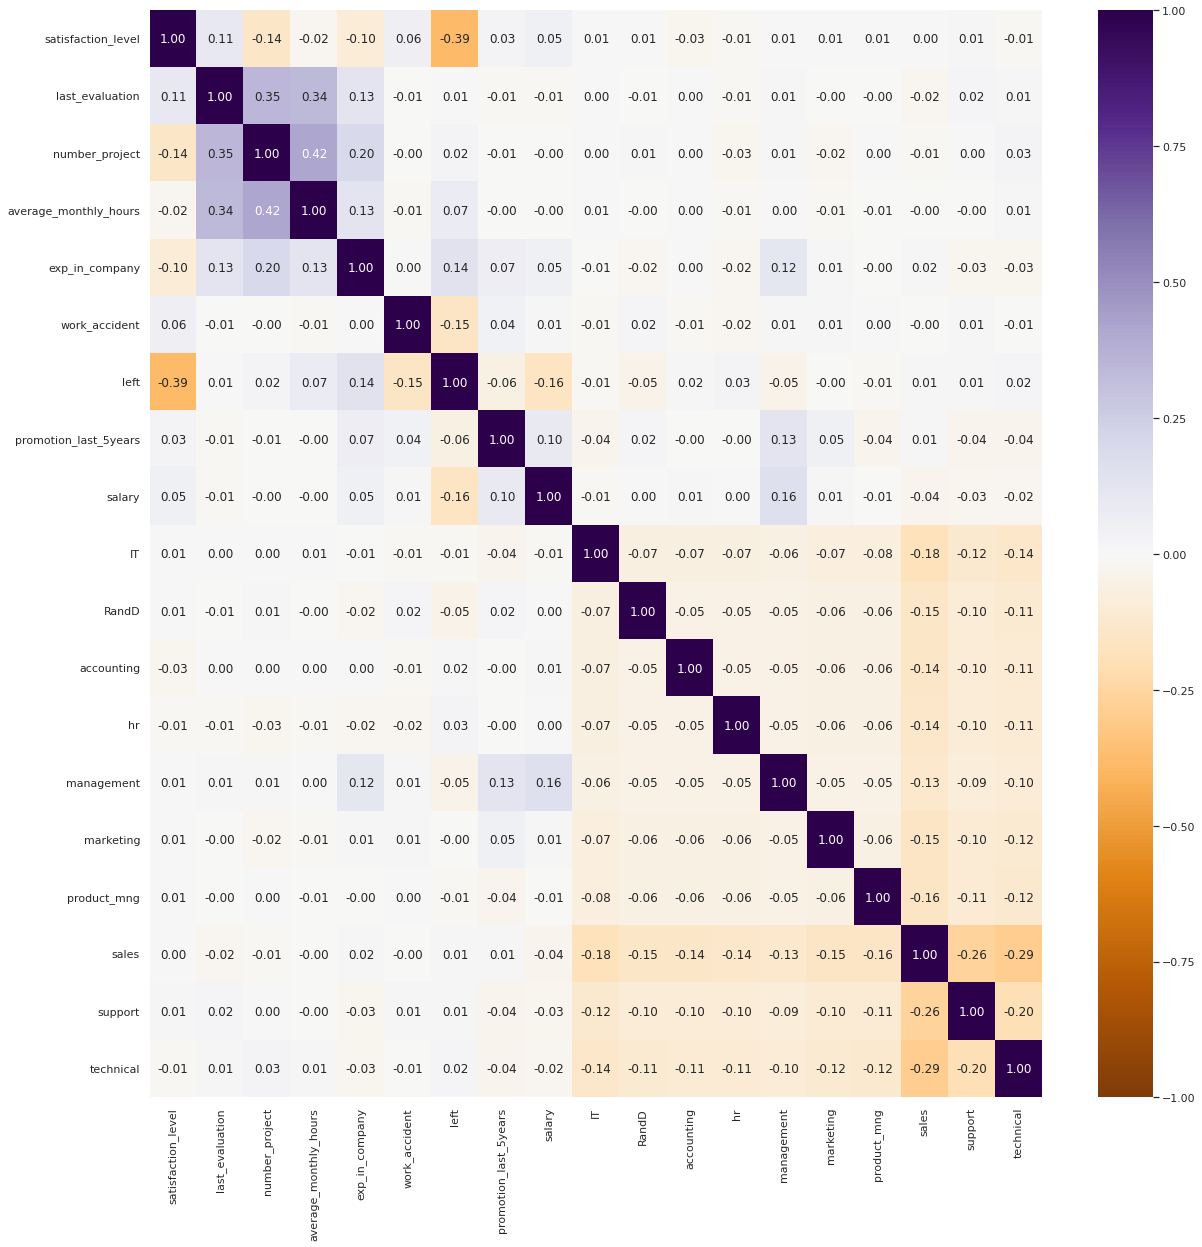

In [23]:
sns.set(rc = {'figure.figsize':(20,20)});
sns.heatmap(df.corr('pearson'), cmap = 'PuOr', fmt = '.2f', annot = True, vmin = -1, vmax = 1, center = 0);

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [25]:
y = df ['left']
X = df.drop(['left'], axis = 1)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 999)

In [27]:
model = LogisticRegression()

#training
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [28]:
#use the model to predict on X-test
y_pred = model.predict(X_test)

In [29]:
from sklearn import metrics

In [30]:
print(f"Accuracy = {metrics.accuracy_score(y_test, y_pred):.4f}")
print(f"Precision = {metrics.precision_score(y_test, y_pred):.4f}")
print(f"Recall = {metrics.recall_score(y_test, y_pred):.4f}")
print(f"F1 Score = {metrics.f1_score(y_test, y_pred):.4f}")

Accuracy = 0.7969
Precision = 0.5972
Recall = 0.3696
F1 Score = 0.4566


In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      3461
           1       0.60      0.37      0.46      1039

    accuracy                           0.80      4500
   macro avg       0.71      0.65      0.67      4500
weighted avg       0.78      0.80      0.78      4500



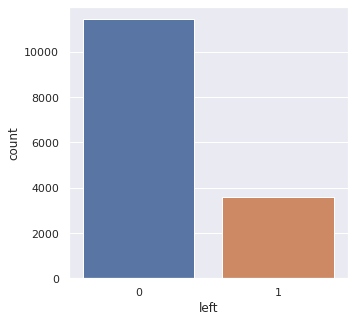

In [32]:
sns.set(rc = {'figure.figsize':(5,5)})
sns.countplot(data = df, x = 'left')

In [33]:
import numpy as np
#filter out employees who have not left the job and obtain index of employees
no_left_index = df[df.left == 0].index

#4000 distinct rows (to reduce the gap between left and not left)
random_index = np.random.choice(no_left_index, 4000, replace = False)

#filter out employees who have left already and obtain index of employees
left_index = df[df.left == 1].index

#concatenate two indexes together
undersample_index = np.concatenate([left_index, random_index])

#changes to under sampling, loc = locate the index
under_sample = df.loc[undersample_index]

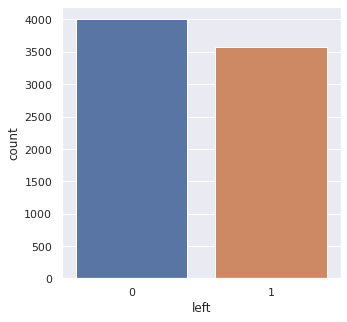

In [34]:
sns.countplot(data = under_sample, x = 'left')

In [35]:
y = under_sample ['left']
X = under_sample.drop(['left'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 999)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [36]:
print(f"Accuracy = {metrics.accuracy_score(y_test, y_pred):.4f}")
print(f"Precision = {metrics.precision_score(y_test, y_pred):.4f}")
print(f"Recall = {metrics.recall_score(y_test, y_pred):.4f}")
print(f"F1 Score = {metrics.f1_score(y_test, y_pred):.4f}")

Accuracy = 0.7751
Precision = 0.7552
Recall = 0.7770
F1 Score = 0.7659
